## <center>INSURANCE CASE STUDY<center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import seaborn as sns
import re
import scipy.stats as stats

In [29]:
claim=pd.read_csv('C:/Users/jmd/Desktop/LALIT/CASE STUDY - python/CS-Insurance/claims.csv')
custd=pd.read_csv('C:/Users/jmd/Desktop/LALIT/CASE STUDY - python/CS-Insurance/cust_demographics.csv')

In [30]:
print(claim.shape)
print(custd.shape)

(1100, 10)
(1085, 6)


In [31]:
claim.head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes


In [32]:
claim.claim_type.nunique()

3

In [33]:
pd.DataFrame(claim.claim_type.unique())

,0
0,Material only
1,Injury only
2,Material and injury


In [34]:
claim.claim_type.drop_duplicates()

0           Material only
5             Injury only
11    Material and injury
Name: claim_type, dtype: object

In [35]:
custd.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver


## Sol 1

In [36]:
cust_final=pd.merge(left=custd,right=claim,left_on="CUST_ID",right_on="customer_id",how="inner")
cust_final.drop(columns = ["customer_id"], inplace = True)
print(cust_final.shape)
cust_final.head(3)

(1085, 15)


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes


## Sol 2

In [38]:
cust_final.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

##### dateofBirth and claim_date should be in datetime format and claim_amount should be of float or int type

## Sol 3

In [39]:
cust_final['claim_amount']=cust_final.claim_amount.apply(lambda x:str(x).replace('$',''))

In [40]:
cust_final['claim_amount']=cust_final.claim_amount.astype(float)
cust_final.claim_amount.dtype

dtype('float64')

## Sol 4

In [42]:
cust_final["flag"]=np.where(cust_final.police_report=="No",0,1)
cust_final.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,1
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,0


## Sol 5

In [43]:
cust_final['claim_date']=pd.to_datetime(cust_final.claim_date,format='%m/%d/%Y')
cust_final.sort_values('claim_date')
cust_final=cust_final.drop_duplicates(subset='CUST_ID',keep='last')
cust_final.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,1
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0


## Sol 6

In [44]:
cust_final.isna().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
flag                    0
dtype: int64

In [45]:
cust_final.dtypes

CUST_ID                         int64
gender                         object
DateOfBirth                    object
State                          object
Contact                        object
Segment                        object
claim_id                        int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
flag                            int32
dtype: object

In [46]:
cust_final.claim_amount

0        2980.0
1        2980.0
3        1950.0
5        1440.0
7        2240.0
         ...   
1080     1770.0
1081     2800.0
1082    33080.0
1083     2840.0
1084     1490.0
Name: claim_amount, Length: 1078, dtype: float64

In [48]:
cust_final.claim_amount=cust_final.claim_amount.fillna(cust_final.claim_amount.mean())

cust_final.total_policy_claims=cust_final.total_policy_claims.fillna(cust_final.total_policy_claims.mean())

In [49]:
cust_final.isna().sum()

CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
flag                   0
dtype: int64

## Sol 7

In [51]:
dob=pd.to_datetime(cust_final.DateOfBirth,format='%d-%b-%y')
dob.dt.year

0       1979
1       1970
3       1984
5       1986
7       1977
        ... 
1080    1981
1081    1996
1082    1990
1083    2064
1084    1995
Name: DateOfBirth, Length: 1078, dtype: int64

In [52]:
cust_final['DateOfBirth']=np.where((dob.dt.year>2030)&(dob.dt.year<2070),dob+pd.DateOffset(years=-100),dob)

In [53]:
cust_final['age']=(((cust_final.claim_date-cust_final.DateOfBirth).dt.days)/365.25).round(0)
cust_final.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,39.0
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,1,49.0


In [54]:
cust_final['Age_grp']=pd.cut(cust_final.age,bins=[0,18,30,60,80],labels=['Children','Youth','Adult','Senior'])
cust_final.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,Age_grp
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,39.0,Adult
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,1,49.0,Adult
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0,34.0,Adult


## Sol 8

In [55]:
cust_final.groupby('Segment').claim_amount.mean()

Segment
Gold        12846.386178
Platinum    12371.644999
Silver      12267.146560
Name: claim_amount, dtype: float64

## Sol 9

In [56]:
req_date=pd.to_datetime('2018-10-01')+pd.DateOffset(days=-20)

In [59]:
cust_final.loc[cust_final.claim_date<req_date,:].groupby('incident_cause').claim_amount.sum()

incident_cause
Crime                 7.219374e+05
Driver error          3.315848e+06
Natural causes        1.312745e+06
Other causes          3.723147e+06
Other driver error    3.277533e+06
Name: claim_amount, dtype: float64

## Sol 10

In [64]:
cust_final.loc[(cust_final.Age_grp=='Adult')&(cust_final.State.isin(['DE','AK','TX']))&
           (cust_final.incident_cause.isin(["Driver error","Other driver error"])),:].groupby('State')['State'].count()

State
AK    8
DE    9
TX    6
Name: State, dtype: int64

#### There are total 23 Adults in total

## Sol11

In [187]:
pie=cust_final.groupby(['Segment','gender']).claim_amount.sum()
pie

Segment   gender
Gold      Female    2.110042e+06
          Male      2.655967e+06
Platinum  Female    2.369720e+06
          Male      2.096443e+06
Silver    Female    1.897302e+06
          Male      2.347131e+06
Name: claim_amount, dtype: float64

array([<AxesSubplot:ylabel='claim_amount'>], dtype=object)

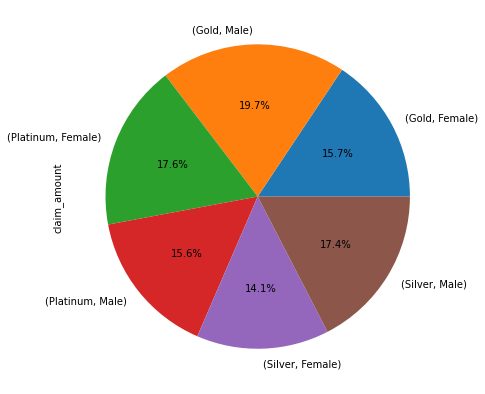

In [188]:
pie.plot(kind='pie',subplots=True,autopct='%1.1f%%',figsize=(12,7))

## Sol 12

In [70]:
sol12=cust_final.loc[cust_final.incident_cause.isin
                     (["Driver error","Other driver error"]),:].groupby('gender')['claim_amount'].count()
sol12

gender
Female    221
Male      281
Name: claim_amount, dtype: int64

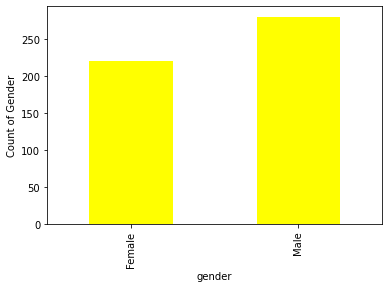

In [71]:
sol12.plot(kind='bar',color='yellow')
plt.ylabel('Count of Gender')
plt.show()

## Sol 13

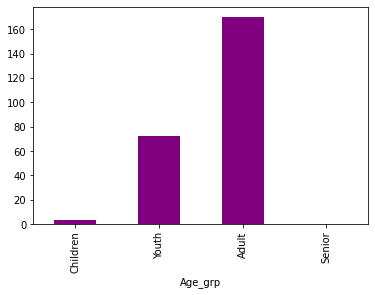

In [191]:
cust_final.loc[cust_final.fraudulent=='Yes',:].groupby('Age_grp')['Age_grp'].count().plot(kind='bar',color='purple')
plt.show()

### 'ADULT' Age_grp had the maximum fraudulent policy claims

## Sol 14

In [192]:
cust_final['Month']=cust_final.claim_date.dt.month

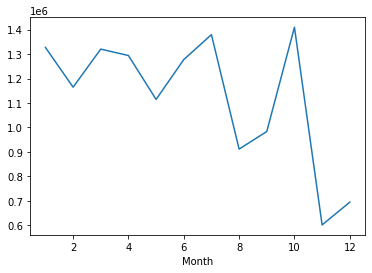

In [193]:
cust_final.groupby('Month').claim_amount.sum().plot(kind='line')
plt.show()

## Sol 15

In [72]:
sol15=pd.DataFrame(cust_final.groupby(['Age_grp','gender',
                                    'fraudulent'])[['CUST_ID','claim_amount']].agg({'CUST_ID':'count','claim_amount':'sum'}))

In [74]:
sol15.head()

CUST_ID  claim_amount
Age_grp  gender fraudulent                       
Children Female No                5  7.738000e+04
                Yes               0  0.000000e+00
         Male   No               14  2.043600e+05
                Yes               3  3.675400e+04
Youth    Female No              132  1.591477e+06

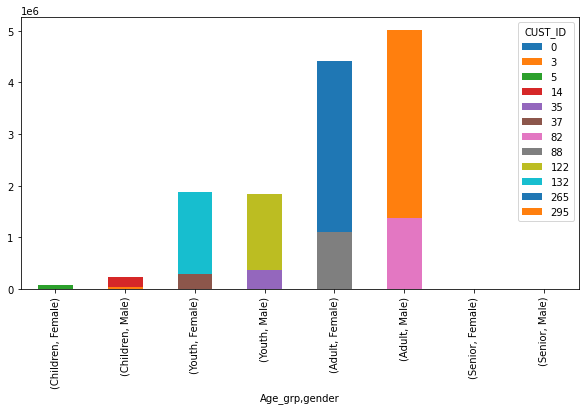

In [195]:
sol15.pivot_table(index=["Age_grp","gender"],columns="CUST_ID",values="claim_amount").plot(kind="bar",stacked=True,
                                                                                           figsize=(10,5))
plt.show()

## Sol 16

In [196]:
cust_final.groupby('gender').claim_amount.mean()

gender
Female    12100.692029
Male      12884.829631
Name: claim_amount, dtype: float64

In [197]:
male_spend = cust_final.loc[cust_final.gender == 'Female','claim_amount']
female_spend = cust_final.loc[cust_final.gender== 'Male','claim_amount']

In [198]:
stats.ttest_ind(male_spend,female_spend)

Ttest_indResult(statistic=-0.9630529881732577, pvalue=0.3357373087404285)

#### As p value is greater than 0.05 so, we fail to reject Null Hypothesis. With 95% Confidence we can say that there is similarity in the amount claimed by males and females.

## Sol 17

In [199]:
obs_table=pd.crosstab(cust_final.Segment,cust_final.Age_grp)
obs_table

Age_grp,Children,Youth,Adult
Segment,,,
Gold,8,107,256
Platinum,7,117,237
Silver,7,102,237


In [200]:
stats.chi2_contingency( obs_table )

(1.2606616110797444,
 0.8680136287428296,
 4,
 array([[  7.57142857, 112.19480519, 251.23376623],
        [  7.36734694, 109.17068646, 244.4619666 ],
        [  7.06122449, 104.63450835, 234.30426716]]))

#### As p value is greater than 0.05 so, we fail to reject Null Hypothesis. With 95% Confidence we can say that Age and Segment category are NOT related to each other

## Sol 18

In [201]:
cust_final.claim_amount.mean()

12501.489634748285

In [202]:
stats.ttest_1samp(cust_final.claim_amount,10000) 

Ttest_1sampResult(statistic=6.146231134929638, pvalue=1.1156022878717526e-09)

#### As p value is greater than 0.05 so, we fail to reject Null Hypothesis.Hence, there has been significant rise in claim amounts as compared to 2016-17

## Sol 19

In [207]:
children_spend = cust_final.loc[ cust_final.Age_grp == 'Children', 'claim_amount' ]
youth_spend = cust_final.loc[ cust_final.Age_grp == 'Youth', 'claim_amount' ]
adult_spend = cust_final.loc[ cust_final.Age_grp == 'Adult', 'claim_amount' ]

In [208]:
children_spend.mean()

14477.0

In [209]:
youth_spend.mean()

11424.172581592666

In [210]:
adult_spend.mean()

12923.056937889634

In [211]:
stats.f_oneway( children_spend, youth_spend, adult_spend )

F_onewayResult(statistic=1.6651732981602647, pvalue=0.18964540078217365)

#### As p value is greater than 0.05 so, we fail to reject Null Hypothesis.Hence,Customers from different Age Groups claimed differently

## Sol 20

In [212]:
stats.pearsonr( cust_final.total_policy_claims,cust_final.claim_amount)

(-0.021900561381465008, 0.47256549705179146)

#### Correlation coefficient value is very low which implies that there is weak correlation.Negative sign indicates that they are inversely related